# Тема “Обучение с учителем”

### Задание 1
> 1. Импортируйте библиотеки pandas и numpy.
> 2. Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
> 3. Создайте датафреймы X и y из этих данных. Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
> 4. Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
> 5. Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
> 6. Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.


##### Импортируйте библиотеки pandas и numpy.

In [1]:
import numpy as np
import pandas as pd

##### Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

In [2]:
from sklearn.datasets import load_boston

##### Создайте датафреймы X и y из этих данных. Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.

In [3]:
# Загрузили датасет
ds = load_boston(); 

# Загрузили датасет data в массив data, т.к. полный датасет содержит 2 массива data и  target
#data = ds.data;
# Загрузили датасет target в массив target
#target = ds.target;
# Загрузили список фич
#feature_names = ds.feature_names;
# Посмотреть колонки датасета ds.keys()
# Посмотреть размерность датасета ds_data.shape
# Список фич (признаков) ds.feature_names
# Посмотреть массив ds_data

> Разобъем данные на датафреймы (тестовый и тренировочный).

In [4]:
x = pd.DataFrame(ds.data, columns = ds.feature_names);
y = pd.DataFrame(ds.target, columns = ['target_price']);

> Загрузим класс для разбиения выборок.

In [5]:
from sklearn.model_selection import train_test_split

> Разобьем датасеты на 2 выборки.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

##### Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.

> Загрузим класс для линейной регрессии.

In [7]:
from sklearn.linear_model import LinearRegression

> Создадим модель линейной регрессии

In [8]:
lr = LinearRegression()

##### Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.

> Посмотрим все признаки 

In [9]:
np.ndarray.tolist(ds.feature_names)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

> Обучение и тренировка модели

In [10]:
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

> Посмотрим график и сравним точность для наших предсказаний.     
Конвертируем некоторые отрицательные числа в положительные, т.к. это скорее всего ошибка. Используем функцию abs.

In [11]:
import matplotlib.pyplot as plt
plt.style.use(['fivethirtyeight'])

fig, ax = plt.subplots(figsize = (14,5))

pr = abs(pd.Series(predictions.flatten()).reset_index(drop = True))
pr_min = pd.Series.min(pr)
pr_max = pd.Series.max(pr)

yt = abs(y_test['target_price'].reset_index(drop = True))
yt_min = pd.Series.min(y_test['target_price'])
yt_max = pd.Series.max(y_test['target_price'])


plt.hist(
    [np.clip(pr, pr_min, pr_max),
     np.clip(yt, yt_min, yt_max),
     ],
    color = ['red', 'green'],
    label = ['Predict', 'Test'],
    density = True
);
plt.legend(loc = 'best');
plt.xlabel('')
fig.tight_layout();
plt.show();

<Figure size 1400x500 with 1 Axes>

In [12]:
check_pred = pd.DataFrame({'test':yt.reset_index(drop = True),'predict':pr})
check_pred['error'] = yt - pr
check_pred.head()


,test,predict,error
0,23.6,28.648960,-5.048960
1,32.4,36.495014,-4.095014
2,13.6,15.411193,-1.811193
3,22.8,25.403213,-2.603213
4,16.1,18.855280,-2.755280


##### Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

> Вычислим среднеквадратичное отклонение руками.

In [13]:
mse_manual = (check_pred['error']**2).mean()
mse_manual


20.028009782816454

> Импортируем mean_squared_error из модуля sklearn.metrics и вычислим его опять, чтобы проверить себя.

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
mse_library = mean_squared_error(yt,pr)
mse_library

20.028009782816447

##### Вычислим  R2

In [16]:
from sklearn.metrics import r2_score

In [17]:
t1 = r2_score(yt,pr)
t1

0.731214900814652

### Задание 2
> 1. Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
> 2. Сделайте агрумент n_estimators равным 1000, max_depth должен быть равен 12 и random_state сделайте равным 42.
> 3. Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0], чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
> 4. Сделайте предсказание на тестовых данных и посчитайте R2. 
> 5. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.


##### Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
##### Сделайте агрумент n_estimators равным 1000, max_depth должен быть равен 12 и random_state сделайте равным 42.

In [18]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth=12, random_state=42, n_estimators=100)

##### Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression, но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0], чтобы получить из датафрейма одномерный массив Numpy, так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.

In [19]:
rfr = model.fit(X_train,  y_train.values[:, 0]);

##### Сделайте предсказание на тестовых данных и посчитайте R2.

In [20]:
pred = rfr.predict(X_test)

t2 = r2_score(y_test,pred)

t2

0.8691643189868505

##### Сравните с результатом из предыдущего задания. Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [21]:
if t1 > t2: 
    print ('Точность модель 1 больше чем модели 2');
elif t1 < t2:
    print ('\nТочность модель 2 больше чем модели 1.');
print('Чем ближе показатель R² к единице тем выше наша точность и наоборот, чем ближе к нулю тем точность ниже.')


Точность модель 2 больше чем модели 1.
Чем ближе показатель R² к единице тем выше наша точность и наоборот, чем ближе к нулю тем точность ниже.


### * Задание 3
> 1. Вызовите документацию для класса RandomForestRegressor, найдите информацию об атрибуте feature_importances_.
> 2. С помощью этого атрибута найдите сумму всех показателей важности,установите, какие два признака показывают наибольшую важность.


##### Вызовите документацию для класса RandomForestRegressor, найдите информацию об атрибуте feature_importances_.

In [22]:
?RandomForestRegressor.feature_importances_

In [23]:
print('feature_importances_ : array of shape = [n_features] \nThe feature importances (the higher, the more important the feature).')

feature_importances_ : array of shape = [n_features] 
The feature importances (the higher, the more important the feature).


##### С помощью этого атрибута найдите сумму всех показателей важности,установите, какие два признака показывают наибольшую важность.

> Находим показатели и объединяем их со списком названий в словарь.

In [24]:
d = dict(zip(ds.feature_names,rfr.feature_importances_))
d

{'CRIM': 0.0317789646134025,
 'ZN': 0.001582418033436312,
 'INDUS': 0.006462708683084199,
 'CHAS': 0.001716301558637786,
 'NOX': 0.01197879093255805,
 'RM': 0.4397287873337629,
 'AGE': 0.011604581592310375,
 'DIS': 0.06602487727575124,
 'RAD': 0.005048523874110854,
 'TAX': 0.011670484018008027,
 'PTRATIO': 0.020627175515947158,
 'B': 0.011514663342870223,
 'LSTAT': 0.3802617232261206}

> Выводим список наиболее важных показателей и их значения.

In [25]:
import operator as o
result = sorted(d.items(), key = o.itemgetter(1) , reverse = True)[:2];
print ('\nНаиболее важные показатели:', result,'\n');


Наиболее важные показатели: [('RM', 0.4397287873337629), ('LSTAT', 0.3802617232261206)] 



### Задание 4
* В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию по библиотеке Matplotlib, это датасет Credit Card Fraud Detection. 
* Для этого датасета мы будем решать задачу классификации - будем определять,какие из транзакциции по кредитной карте являются мошенническими.
* Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки),так что применение метрики accuracy не принесет пользы и не поможет выбрать лучшую модель.Мы будем вычислять AUC, то есть площадь под кривой ROC.

> 1. Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.
> 2. Загрузите датасет creditcard.csv и создайте датафрейм df.
> 3. С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована.
> 4. Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.
> 5. Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:
pd.options.display.max_columns = 100.
> 6. Просмотрите первые 10 строк датафрейма df.
> 7. Создайте датафрейм X из датафрейма df, исключив столбец Class.
> 8. Создайте объект Series под названием y из столбца Class.
> 9. Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, используя аргументы: test_size=0.3, random_state=100, stratify=y.
У вас должны получиться объекты X_train, X_test, y_train и y_test.
> 10.Просмотрите информацию о их форме.
> 11. Для поиска по сетке параметров задайте такие параметры:
parameters = [{'n_estimators': [10, 15],
'max_features': np.arange(3, 5),
'max_depth': np.arange(4, 7)}]
> 12. Создайте модель GridSearchCV со следующими аргументами:
estimator=RandomForestClassifier(random_state=100),
param_grid=parameters,
scoring='roc_auc',
cv=3.
> 13. Обучите модель на тренировочном наборе данных (может занять несколько минут).
> 14. Просмотрите параметры лучшей модели с помощью атрибута best_params_.
> 15. Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.
> 16. Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив y_pred_proba. 
> 17. Из модуля sklearn.metrics импортируйте метрику roc_auc_score.
> 18. Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных, используя в качестве аргументовмассивы y_test и y_pred_proba.


##### Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.

In [26]:
import matplotlib.pyplot as plt
plt.style.use(['fivethirtyeight'])
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

##### Загрузите датасет creditcard.csv и создайте датафрейм df.

In [27]:
SOURCE_CSV = 'C:/Users/dmitriy.ivanov/Downloads/creditcard.csv'
df = pd.read_csv(SOURCE_CSV)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


##### С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована.

In [28]:
df_class = pd.Series.value_counts(df['Class'].values, sort = False, dropna = False, normalize = True);
df_class

0    0.998273
1    0.001727
dtype: float64

##### Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.

In [29]:
pd.DataFrame(df).info == np.nan

False

##### Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма: pd.options.display.max_columns = 100.

In [30]:
pd.options.display.max_columns = 100

##### Просмотрите первые 10 строк датафрейма df

In [31]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


##### Создайте датафрейм X из датафрейма df, исключив столбец Class.

In [32]:
X = df.loc[:,'Time':'Amount']
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

##### Создайте объект Series под названием y из столбца Class.

In [33]:
y = pd.Series(df['Class'])
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

##### Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, используя аргументы: test_size=0.3, random_state=100, stratify=y.

In [34]:
X__train, X__test, y__train, y__test = train_test_split(X,y, test_size = 0.3, random_state = 100, stratify = y)

##### Для поиска по сетке параметров задайте такие параметры: parameters = [{'n_estimators': [10, 15], 'max_features': np.arange(3, 5), 'max_depth': np.arange(4, 7)}]

In [35]:
parameters =  [{'n_estimators': [10, 15], 'max_features': np.arange(3, 5), 'max_depth': np.arange(4, 7)}]

##### Создайте модель GridSearchCV со следующими аргументами: estimator=RandomForestClassifier(random_state=100), param_grid=parameters, scoring='roc_auc', cv=3.

In [36]:
GridSearchCV = GridSearchCV(estimator = RandomForestClassifier(random_state=100), 
                            param_grid = parameters, 
                            scoring = 'roc_auc', cv = 3)

##### Обучите модель на тренировочном наборе данных (может занять несколько минут).

In [37]:
GridSearchCV.fit(X__train, y__train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [10, 15], 'max_features': array([3, 4]), 'max_depth': array([4, 5, 6])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

##### Просмотрите параметры лучшей модели с помощью атрибута best_params_.

In [38]:
print(GridSearchCV.best_params_)

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}


##### Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.

In [39]:
gs = GridSearchCV.predict_proba(X__train)
print(gs)

[[9.99717846e-01 2.82154033e-04]
 [9.99717846e-01 2.82154033e-04]
 [9.99717846e-01 2.82154033e-04]
 ...
 [9.99717846e-01 2.82154033e-04]
 [9.99717846e-01 2.82154033e-04]
 [9.99737336e-01 2.62663815e-04]]


##### Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив y_pred_proba.

In [40]:
y_pred_proba = gs[:,1]
# или можно сделать тоже самое через датафрейм y_pred_proba = np.array(pd.DataFrame(gs)[1])
y_pred_proba

array([0.00028215, 0.00028215, 0.00028215, ..., 0.00028215, 0.00028215,
       0.00026266])

##### Из модуля sklearn.metrics импортируйте метрику roc_auc_score.

In [41]:
from sklearn.metrics import roc_auc_score

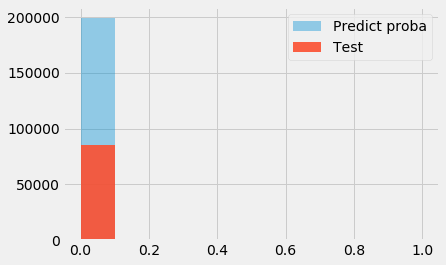

In [42]:
plt.hist(y_pred_proba,alpha= 0.4,label = 'Predict proba');
plt.hist(y__test,alpha= 0.9, label = 'Test');
plt.legend(loc = 'best')

##### Построим ROC - кривую

In [43]:
from sklearn.metrics import roc_curve

In [44]:
m1,m2,m3 = roc_curve(y__train, y_pred_proba, pos_label = 0)

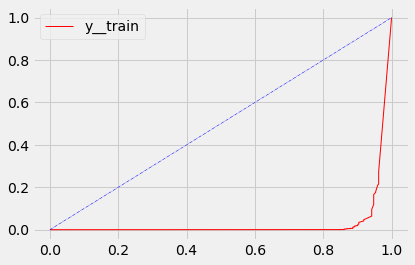

In [45]:
plt.plot(m1,m2,color = 'red',linewidth = 1, label ='y__train')
plt.plot([0,1],[0,1],color = 'blue',linestyle = '-.', linewidth = 0.5,markersize= 1);
plt.legend(loc='best');

##### Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных, используя в качестве аргументов массивы y_test и y_pred_proba.

In [46]:
RAUC_train = roc_auc_score(y__train, y_pred_proba);

In [47]:
GridSearchCV.fit(X__test, y__test);

In [48]:
gs1 = GridSearchCV.predict_proba(X__test);

In [49]:
y1_pred_proba = gs1[:,1];

In [50]:
RAUC_test = roc_auc_score(y__test, y1_pred_proba);

In [53]:
print('Тестовые данные:\t',RAUC_test,'\nТренировочные данные:\t',RAUC_train)

Тестовые данные:	 0.96098956245653 
Тренировочные данные:	 0.9703527882554751
